# Ridge Regression Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../../GaussianProcessBandits")
from gpbandits import *
from models.ridge_reg import *
from models.helpers import *

from sklearn import datasets
from sklearn.metrics import mean_squared_error

Simple Dataset Loading

In [25]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
X = X[0:100,:]
y = y[0:100]

data = Dataset(X,y)

## Grid Search

In [41]:
model = RidgeReg()
lowest_error = float("inf")
for point in np.linspace(0,1,100):
    model.decode([point])
    error = model.train_test_cv(data)
    #print(point," ", error)
    if(error < lowest_error):
        lowest_error = error
        best_point = point
        
print("Lowest error: {} with point value {}".format(lowest_error,best_point))

Lowest error: 3086.381448412221 with point value 0.18181818181818182


## Random Sample

In [32]:
model = RidgeReg()
lowest_error = np.finfo("float").max
n_samples = 50
best_model_log_random = []

for i in range(n_samples):
    point = np.random.rand(1)
    model.decode(point)
    error = model.train_test_cv(data)
    if(error < lowest_error):
        lowest_error = error
        best_point = point
    best_model_log_random.append(best_point)
    

## Gaussian Process Bandits Approach

In [34]:
best_model, best_model_log_gp = gpbandits(model, data, iters=n_samples-1, kernel='se', cl=0.1, v=0.1, best_model_log=True)

Iteration: 000 | Design Point: 0.353470 | Score: 3.481436e+03
Iteration: 001 | Design Point: 0.999911 | Score: 1.322498e+04
Iteration: 002 | Design Point: 0.002249 | Score: 3.207036e+03
Iteration: 003 | Design Point: 0.653729 | Score: 4.699553e+03
Iteration: 004 | Design Point: 0.174727 | Score: 3.086424e+03
Iteration: 005 | Design Point: 0.479546 | Score: 4.080743e+03
Iteration: 006 | Design Point: 0.779452 | Score: 5.438345e+03
Iteration: 007 | Design Point: 0.239553 | Score: 3.129171e+03
Iteration: 008 | Design Point: 0.001765 | Score: 3.207379e+03
Iteration: 009 | Design Point: 0.165053 | Score: 3.087937e+03
Iteration: 010 | Design Point: 0.188390 | Score: 3.087225e+03
Iteration: 011 | Design Point: 0.185805 | Score: 3.086788e+03
Iteration: 012 | Design Point: 0.185309 | Score: 3.086720e+03
Iteration: 013 | Design Point: 0.185873 | Score: 3.086797e+03
Iteration: 014 | Design Point: 0.188553 | Score: 3.087257e+03
Iteration: 015 | Design Point: 0.000497 | Score: 3.208275e+03
Iteratio

## Comparison

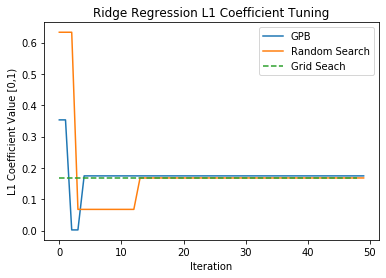

In [39]:
plt.plot(best_model_log_gp, label="GPB")
plt.plot(best_model_log_random, label="Random Search")
plt.plot(best_point*np.ones(n_samples-1), "--", label="Grid Seach")
plt.xlabel("Iteration")
plt.ylabel("L1 Coefficient Value [0,1)")
plt.title("Ridge Regression L1 Coefficient Tuning")
plt.legend()
plt.savefig("ComparisonGPBvsRandomSearch")